# Neural Networks Sprint Challenge

In [2]:
from sklearn import metrics, model_selection
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

## 1) Define the following terms:

- Neuron: 
  The individual unit of computation in a neural network, comprising of an activation<br>
  function which is fed the dot product of input and weights, plus some bias.
  
- Input Layer:
  The first layer of neurons which consume data into the network.

- Hidden Layer:
  Any layer of neurons that sits between the input and output layers.

- Output Layer:
  The last layer of a neural network which yields the final values of the overall<br>
  computation.

- Activation: 
  A function which assigns every rational value to a point within a given range, the<br> 
  intution being that inputs are discriminated against according to their value, such<br>
  "important" features will cause activation functions to fire, while the "unimportant"<br>
  will not.
  
- Backpropagation:
  An algorithm for updating the weights of a neural network by iteratively running a<br>
  given input through it, determining the error, and using gradient descent to minimize<br>
  that error.

## 2) Create a perceptron class that can model the behavior of an AND gate. You can use the following table as your training data:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 1  | 1  | 1  | 1 |
| 1  | 0  | 1  | 0 |
| 0  | 1  | 1  | 0 |
| 0  | 0  | 1  | 0 |

#### Training Data

In [55]:
X = np.array([
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
    [0, 0, 1],
])
y = np.array([1, 0, 0, 0])

#### Activation Function

In [56]:
def step(x):
    return 1 if x > 0 else 0

#### Perceptron

In [57]:
class Perceptron:
    def __init__(self, learning_rate=0.01, activation=step, max_iter=100, verbose=False, metric=None):
        self.learning_rate = learning_rate
        self.activation = activation
        self.max_iter = max_iter
        self.verbose = verbose
        self.metric = metric
        self.scores = np.array([])
        
    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        self.weights = np.random.normal(size=X.shape[1])
        
        for _ in range(self.max_iter):
            for x, yt in zip(X, y):
                for i in range(x.size):
                    self.weights[i] = self.weights[i] + self.learning_rate * (yt - self.predict(x))*x[i]

            if self.metric:
                self.scores = np.append(self.scores, self.metric(y, self.predict(X)))    
                if self.verbose:
                    print("Epoch: {}, Score: {}".format(i, scores[-1]))
        
        return self                                                       

    def predict(self, X):
        if len(X.shape) == 1:
            return self.activation(self.weights.dot(X))
        else:            
            return np.array([self.predict(x) for x in X])

#### Training

In [58]:
perceptor = Perceptron(
    learning_rate=0.04, 
    max_iter=100, 
    metric=metrics.accuracy_score
)

In [59]:
perceptor.fit(X, y)

In [60]:
assert perceptor.predict(np.array([1, 1, 0, 0])) == 0
assert perceptor.predict(np.array([1, 1, 0, 1])) == 0

In [61]:
np.c_[X, perceptor.predict(np.c_[np.ones(X.shape[0]), X])]

array([[1, 1, 1, 0],
       [1, 0, 1, 0],
       [0, 1, 1, 0],
       [0, 0, 1, 0]])

#### Visualization

Text(0,0.5,'Accuracy')

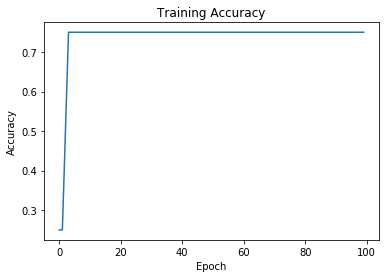

In [62]:
plt.plot(perceptor.scores)

plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

Text(0.5,1,'Perceptron Weights')

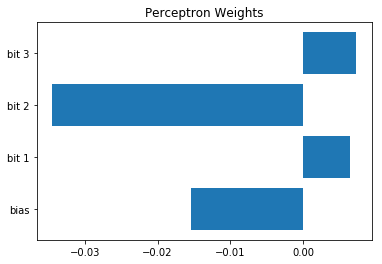

In [63]:
plt.barh(["bias", "bit 1", "bit 2", "bit 3"], perceptor.weights)
plt.title("Perceptron Weights")

## 3) Implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. 
- Your network must have one hidden layer. 
- You do not have to update weights via gradient descent. You can use something like the derivative of the sigmoid function to update weights.
- Train your model on the Heart Disease dataset from UCI:

[Github Dataset](https://github.com/ryanleeallred/datasets/blob/master/heart.csv)

[Raw File on Github](https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv)

In [64]:
heart = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')

In [65]:
heart.isna().sum().sum()

0

In [66]:
heart.select_dtypes(exclude=np.number).size == 0

True

In [67]:
heart.shape

(303, 14)

In [73]:
X = heart.drop(columns="target").values
y = heart.target

In [86]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [200]:
def sigmoid_derivative(X):
    return X * (1 - X)

In [171]:
class NeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.4, max_iter=100, activation=sigmoid):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.layer_sizes = layer_sizes
        self.activation = activation
            
        self.output = np.random.normal(size=(1, self.layer_sizes[-1]))
        self.layers = [self.output]
        
        for size in self.layer_sizes[0:-1][:
                                           :-1]:
            self.layers.append(
                np.random.normal(size=(size, self.layers[-1].shape[0]))
            )
           
        self.layers.reverse()
    
    def feedfoward(self, X, j=None):
        activations = X.dot(self.layers[0])
        
        for layer in self.layers[1:j]:
            activations = self.activation(activations.dot(layer))
            
        return activations
    
    def error(self, y_true, y_pred):
        return 0.5*((y_true.reshape(y_pred.shape) - y_pred)**2).sum()
    
    def propogate(self, X, y_true, y_pred)    
        error =  y_true - y_pred
        delta = error * sigmoid_derivative(y_pred)
    
    def fit(self, X, y):
        X, y = np.array(X), np.array(y)
        y_pred = self.feedfoward(X)
        output_error = self.error(y, y_pred)

        for n in range(self.output.shape[0]):
            for j in range(self.layers.shape[0]):
                for i in range(self.layers[j].size):
                    self.learning_rate*  y_pred[n]
                    
                
    def predict(self, X):
        if len(X.shape) == 1:
            return self.activation(self.weights.dot(X))
        else:            
            return np.array([self.predict(x) for x in X])

In [172]:
NeuralNetwork([13, 5, 1]).fit(X, y)

46.99553986059613

## 4) Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy. 

- Use the Heart Disease Dataset (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network. 
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
- When hyperparameter tuning, show you work by adding code cells for each new experiment. 
- Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
- You must hyperparameter tune at least 5 parameters in order to get a 3 on this section.

#### Setup Data

In [191]:
X = heart.drop(columns='target')
y = heart.target

In [192]:
X.shape, y.shape

((303, 13), (303,))

In [193]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

#### Construct Model

In [194]:
def classifer(dropout_rate=0.2, activation='relu'):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(13, input_dim=13, activation=activation))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(13, activation=activation))
    model.add(tf.keras.layers.Dense(5, activation=activation))
    model.add(tf.keras.layers.Dense(8, activation=activation))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])
    return model

#### Train Model

In [358]:
estimator = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=classifer, epochs=100, verbose=2)
model_selection.cross_val_score(estimator, X, y, cv=2)

Epoch 1/100
 - 1s - loss: 0.8614 - acc: 0.6225
Epoch 2/100
 - 0s - loss: 0.4535 - acc: 0.9139
Epoch 3/100
 - 0s - loss: 0.4176 - acc: 0.9139
Epoch 4/100
 - 0s - loss: 0.3881 - acc: 0.9139
Epoch 5/100
 - 0s - loss: 0.3688 - acc: 0.9139
Epoch 6/100
 - 0s - loss: 0.3573 - acc: 0.9139
Epoch 7/100
 - 0s - loss: 0.3329 - acc: 0.9139
Epoch 8/100
 - 0s - loss: 0.3201 - acc: 0.9139
Epoch 9/100
 - 0s - loss: 0.3057 - acc: 0.9139
Epoch 10/100
 - 0s - loss: 0.2949 - acc: 0.9139
Epoch 11/100
 - 0s - loss: 0.2910 - acc: 0.9139
Epoch 12/100
 - 0s - loss: 0.2892 - acc: 0.9139
Epoch 13/100
 - 0s - loss: 0.2876 - acc: 0.9139
Epoch 14/100
 - 0s - loss: 0.2873 - acc: 0.9139
Epoch 15/100
 - 0s - loss: 0.2848 - acc: 0.9139
Epoch 16/100
 - 0s - loss: 0.2834 - acc: 0.9139
Epoch 17/100
 - 0s - loss: 0.2748 - acc: 0.9139
Epoch 18/100
 - 0s - loss: 0.2692 - acc: 0.9205
Epoch 19/100
 - 0s - loss: 0.2648 - acc: 0.9205
Epoch 20/100
 - 0s - loss: 0.2589 - acc: 0.9205
Epoch 21/100
 - 0s - loss: 0.2552 - acc: 0.9205
E

array([0.01973684, 1.        ])

In [359]:
model = classifer()

In [361]:
history = model.fit(X, y, epochs=300)

Epoch 1/300
303/303 [==============================] - 1s 4ms/sample - loss: 0.7941 - acc: 0.5908
Epoch 2/300
303/303 [==============================] - 0s 124us/sample - loss: 0.6221 - acc: 0.6733
Epoch 3/300
303/303 [==============================] - 0s 131us/sample - loss: 0.6375 - acc: 0.6370
Epoch 4/300
303/303 [==============================] - 0s 128us/sample - loss: 0.5965 - acc: 0.7063
Epoch 5/300
303/303 [==============================] - 0s 131us/sample - loss: 0.5965 - acc: 0.6667
Epoch 6/300
303/303 [==============================] - 0s 111us/sample - loss: 0.5924 - acc: 0.6898
Epoch 7/300
303/303 [==============================] - 0s 130us/sample - loss: 0.5923 - acc: 0.6700
Epoch 8/300
303/303 [==============================] - 0s 131us/sample - loss: 0.5833 - acc: 0.6667
Epoch 9/300
303/303 [==============================] - 0s 116us/sample - loss: 0.5821 - acc: 0.6733
Epoch 10/300
303/303 [==============================] - 0s 134us/sample - loss: 0.5903 - acc: 0.7096
E

#### Evaluate Model

In [363]:
metrics.accuracy_score(y_test, network.predict(X_test))

0.4605263157894737

Text(0.5,1,'Training Loss')

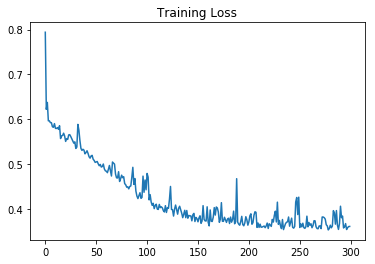

In [367]:
plt.plot(history.history['loss'])

plt.title("Training Loss")

Text(0.5,1,'Training Accuracy')

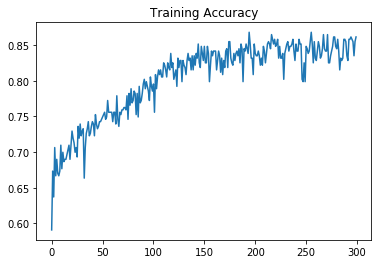

In [368]:
plt.plot(history.history['acc'])

plt.title("Training Accuracy")

#### Paramater Tuning

In [195]:
estimator = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=classifer)

In [198]:
searcher = model_selection.GridSearchCV(
    estimator,
    scoring='accuracy',
    param_grid={
        'dropout_rate': [0.2, 0.4, 0.6],
        'activation': ['relu', 'elu'],
        'epochs': [50, 100]
    }
)

In [199]:
searcher.fit(X_train, y_train)

Epoch 1/50
151/151 [==============================] - 1s 6ms/sample - loss: 7.9196 - acc: 0.4437
Epoch 2/50
151/151 [==============================] - 0s 150us/sample - loss: 6.9412 - acc: 0.3974
Epoch 3/50
151/151 [==============================] - 0s 135us/sample - loss: 5.3918 - acc: 0.4371
Epoch 4/50
151/151 [==============================] - 0s 136us/sample - loss: 3.6070 - acc: 0.5099
Epoch 5/50
151/151 [==============================] - 0s 147us/sample - loss: 4.6428 - acc: 0.5364
Epoch 6/50
151/151 [==============================] - 0s 143us/sample - loss: 3.6823 - acc: 0.5960
Epoch 7/50
151/151 [==============================] - 0s 140us/sample - loss: 3.0215 - acc: 0.5629
Epoch 8/50
151/151 [==============================] - 0s 145us/sample - loss: 3.4939 - acc: 0.4636
Epoch 9/50
151/151 [==============================] - 0s 140us/sample - loss: 3.5777 - acc: 0.4371
Epoch 10/50
151/151 [==============================] - 0s 157us/sample - loss: 2.8554 - acc: 0.4901
Epoch 11/50

GridSearchCV(cv=None, error_score='raise',
       estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fac0175bdd8>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'dropout_rate': [0.2, 0.4, 0.6], 'activation': ['relu', 'elu'], 'epochs': [50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [203]:
searcher.best_params_

{'activation': 'relu', 'dropout_rate': 0.4, 'epochs': 100}

In [204]:
searcher.best_score_

0.6696035242290749